In [1]:
from IPython.display import Image



# Классификация текстов

## Екатерина Черняк

echernyak@hse.ru



## Постановка задачи

* $d \in D$ – документы
* $c \in C$ – классы 


* Бинарная классификация: $C = \{0, 1\}$ 
* Многоклассовая классификация [multiclass classification]: $C = \{0, ..., K\}$
* Многотемная классификация [multi-label classification]: $C = \{0,1\}^K$

## Примеры

* Фильтрация спама: $C = \{spam, ham\}$ – бинарная классификация
* Классификация по тональности: $C =  \{neutral, positive, negative\}$ – классификация с тремя классами
* Рубрикация: $C \in \{религия, праздники, спорт, фестивали, ... \}$ – классификация на несколько тем
* Определение авторства:
    * Этим ли автором написан текст: $ C = \{0, 1\}$?
    * Кем из этих авторов написан текст: $ C = \{a_1, a_2, a_3, ... \}$?
    * Пол автора: $ C = \{f, m\}$


## Методы классификации


### По правилам

* Если в предложении встречается личное местоимение первого лица и глагол с окончанием женского рода, то пол автора = $f$.
* Если доля положительно окрашенных прилагательтельных в отзыве больше доли отрицательно окрашенных прилагательных, то отзыв относится к классу $posititive$.


### С использованием алгоритмов машинного обучения 

$ \gamma : D \rightarrow C$ - алгоритм классификации

$({D^{train}, C^{train}})$ – обучающее множество 

$({D^{test}, C^{test}})$ – тестовое множество 

#### Основные методы
* Метод наивного Байеса
* Логистическая регрессия 
* Сверточные нейронные сети
* FastText

## Меры качества бинарной классификации 

<table>
  <tr>
    <th colspan="2" rowspan="2"></th>
    <th colspan="2">gold <br>standart</th>
  </tr>
  <tr>
    <td>positive</td>
    <td>negative</td>
  </tr>
  <tr>
    <td rowspan="2">classification <br>output</td>
    <td>positive</td>
    <td>$tp$</td>
    <td>$fp$</td>
  </tr>
  <tr>
    <td>negative</td>
    <td>$fn$</td>
    <td>$tn$</td>
  </tr>
</table>


$precision = Pr =  \frac{tp}{tp+fp} $ – точность 

$recall = R = \frac{tp}{tp+fn} $ – полнота 

$F_2 = \frac{2 Pr * R}{Pr + R}$ – $F$-мера 

$accuracy = \frac{tp + tn}{tp + fp + fn + tn}$ –  аккуратность  

## Меры качества многоклассовой классификации 

<table>
  <tr>
    <th></th>
    <th></th>
    <th colspan="3">gold <br>standart</th>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td>$class_1$</td>
    <td>$class_2$</td>
    <td>$class_3$</td>
  </tr>
  <tr>
    <td rowspan="3">classification <br>output</td>
    <td>$class_1$</td>
    <td>$tp_1$</td>
    <td>$fp_{12}$</td>
    <td>$fp_{13}$</td>
  </tr>
  <tr>
    <td>$class_2$</td>
    <td>$fn_{21}$</td>
    <td>$tp_2$</td>
    <td>$fp_{23}$</td>
  </tr>
  <tr>
    <td>$class_3$</td>
    <td>$fn_{31}$</td>
    <td>$fn_{32}$</td>
    <td>$tp_3$</td>
  </tr>
</table>


Микро-усреднение:

$micro-precision = micro-Pr =  \frac{\sum tp_i}{\sum tp_i + \sum fp_i} $ 

$micro-recall = micro-R = \frac{\sum tp_i}{\sum tp_i+ \sum fn_i } $

Макро-усреднение:

$macro-precision = macro-Pr =  \frac{\sum Pr_i}{|C|} $

$macro-recall = macro-R = \frac{\sum R_i}{|C|} $ 





## Источники данных
* IMDB 
* newsgroup20
* Reuters 
* Кинопоиск
* Научные статьи
* 


## (Напоминание) Векторная модель: документ – вектор признаков 

* $d \in D$ – документы
* $w \in V$ – словарь, всего слов |V|

* традиционное представление: одно слово – одна размерность в векторной модели: $\vec{d_i} = <f_1, ... , f_{|V|}> $
* $f$ – компоненты вектора – могут быть:
    * 0 и 1
    * частотами
    * $tf-idf$ весами
* с использованием распределенных представлений слов [word embeddings]:
    * покомпонентное среднее векторов слов, входящих в текст
    * покомпонентный максимум векторов слов, входящих в текст
* с использованием распределенных представлений текстов [doc embeddings]:
    * doc2vec
    * fastText
    * снижение размерности в векторной модели, в т. ч. сингулярное разложение [singular value decomposition, SVD]

## (Напоминание) Вычисление расстояния / близости между документами 

Евклидово расстояние: $ dist( \vec{d_i}, \vec{d_j}) = \sqrt { \sum_{k} ( d_i^k - d_j^k)^2 }$

Косинусная мера близости: $ sim( \vec{d_i}, \vec{d_j}) =  \cos(\theta )=  \frac{ \vec{d_i}\cdot \vec{d_j} }{\| \vec{d_i} \|_{2}\|\vec{d_j} \|_{2}}$

## Метод ближайшего соседа  [Nearest neighbor classifier]

Найдем $k$ ближайших соседей (самых близких документов) для документа $d$. Посмотрим на то, каким классам относятся документы: выберем модальный класс – будем считать его классом $d$.





In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train_counts, twenty_train.target)

In [5]:
import numpy as np
from sklearn.metrics import *
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=42)
X_test = count_vect.transform(twenty_test.data)
print(X_test.shape)
predicted = clf.predict(X_test)

(1502, 35788)


In [6]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.5599
micro F1=0.5599, micro P=0.5599, micro R=0.5599
macro F1=0.5507, macro P=0.5580, macro R=0.5963



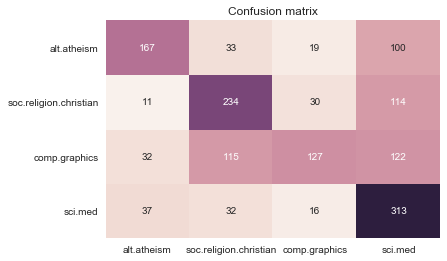

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

In [8]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

God is love => comp.graphics
OpenGL on the GPU is fast => comp.graphics


## Метод наивного Байеса  [Multinomial naive Bayes classifier]

Требуется оценить вероятность принадлежности документа $d \in D$ классу $c \in C$: $p(c|d)$. Каждый документ –  мешок слов, всего слов $|V|$.
	
$p(c)$ – априорная вероятность класса $c$
   
$p(c|d)$ – апостериорная вероятность класса $c$
	
	




$ p(c|d) = \frac{p(d|c)p(c)}{p(d)} $

Пусть документ $d$ описан признаками $f_1, \dots, f_N$.

$ c_{NB} = \arg \max _{c \in C} p (c|d) = \arg \max_{c \in C}  \frac{p(d|c)p(c)}{p(d)} \propto $
	
$ \propto \arg \max_{c \in C} p(d|c)p(c)  = \arg \max_{c \in C} p(f_1, f_2, \dots, f_{N} | c)p(c)$

### Предположение о независимости 

* Мешок слов: порядок слов не имеет значения
* Условная независимость (наивное предположение): вероятности признаков $p(f_i|c_j)$ внутри класса $c_j$ независимы

$p(f_1, f_2, \dots, f_{N} | c) \times  p(c) =   p(f_1|c) \times p(f_2|c) \times \dots \times p(f_{N}|c)  \times p(c)$



$C_{NB}=\arg \max_{c \in C} p(c) \times \prod_{1 \le i \le N} p(f_i|c) $

Допустим, что признаки $f_i$ – слова $w_i$, а $\texttt{positions}$ – все позиции слов в документе.


$C_{NB} = p(c) \times \prod_{i \in \texttt{positions}} p(w_i|c) $

### Обучение наивного Байесовского классификатора

#### ММП оценки вероятностей:
	
$ \widehat{p_(c_j)} = \frac{| \{d| d \in c_j\} |}{|D|} $
	
$ \widehat{p(w_i | c_j)} = \frac{\texttt{count}(w_i, c_j)}{\sum_{w \in V} \texttt{count}(w, c_j)} $
	
Создаем $|C|$ мегадокументов: каждый документ = все документы в одном классе, склеенные в один мегадокумент и вычисляем частоты $w$ в мегадокументах.
	


#### Проблема нулевых вероятностей:  

$\texttt{count}(w_i, c_j)$ может быть равно нулю. 

Допустим, что каждое слово встречается как минимум $\alpha$ раз в мешке слов.
	
Преобразование Лапласа: $ \frac{+\alpha}{+\alpha |V|}$
	
$ \widehat{p(w_i | c_j)} = \frac{\texttt{count}(w_i, c_j) + \alpha}{(\sum_{w \in V} \texttt{count}(w, c_j)) + \alpha |V| } $

### Пример. Тематическая классификация
	
    


<table>
  <tr>
    <th></th>
    <th>документ</th>
    <th>класс</th>
  </tr>
  <tr>
    <td rowspan="4">обучающее<br>множество</td>
    <td>Chinese Beijing Chinese</td>
    <td>c</td>
  </tr>
  <tr>
    <td>Chinese Chinese Shanghai</td>
    <td>c</td>
  </tr>
  <tr>
    <td>Chinese Macao</td>
    <td>c</td>
  </tr>
  <tr>
    <td>Tokyo Japan Chinese</td>
    <td>j</td>
  </tr>
  <tr>
    <td>тестовое<br>множество</td>
    <td>Chinese Chinese Chinese Tokyo Japan</td>
    <td>?</td>
  </tr>
</table>




$p(c) =\frac{3}{4}$,$p(j) = \frac{1}{4}$

$p(\texttt{Chinese|c)}= (5+1)/(8+6)=6/14=3/7$  

$p(\texttt{Chinese|j)}= (1+1)/(3+6)=2/9$  

$p(\texttt{Tokyo|c)}= (0+1)/(8+6)=1/14$  

$p(\texttt{Tokyo|j)}= (1+1)/(3+6)=2/9$  

$p(\texttt{Japan|c)}= (0+1)/(8+6)=1/14$  

$p(\texttt{Japan|j)}= (1+1)/(3+6)=2/9$


$p(c|d_5) = 3/4 \times (3/7)^3 \times 1/14 \times 1/14 \approx 0.0003$

$p(j|d_5) = 1/4 \times (2/9)^3 \times 2/9 \times 2/9 \approx 0.0001$

### Мультиномиальный наивный Байсовский классификатор

Слова в тексте распределены по мультиномиальному закону:

$ p(d |c )={\frac {(\sum _{i}x_{i})!}{\prod _{i}x_{i}!}}\prod _{i}{p_{ki}}^{x_{i}} $


In [9]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

In [10]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.9341
micro F1=0.9341, micro P=0.9341, micro R=0.9341
macro F1=0.9330, macro P=0.9326, macro R=0.9341



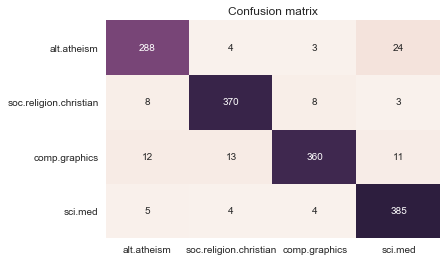

In [11]:
sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

In [12]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

God is love => soc.religion.christian
OpenGL on the GPU is fast => comp.graphics


## Логистическая регрессия (метод максимальной энтропии [MaxEnt])

Требуется оценить вероятность принадлежности документа $d \in D$ классу $c \in C$: $p(c|d)$. Пусть заданы признаки  $f_i \in F$ – множество признаков и  $w_i$ – их веса. 

Признаки могут зависеть от классов: $f_i(c,d)$  

Линейная комбинация этих признаков: $\sum_{i=1}^k w_i f_i(c,d)$.  

Как связана $\sum_{i=1}^k w_i f_i(c,x)$ и $p(c|d)$?
	
$p(c|d) = \frac{1}{Z} e^{\sum_{i=1}^k w_i f_i(c,d)},$
	
где $\frac{1}{Z} = \frac{1}{\sum_{c' \in C} e^{\sum_{i=1}^k w_i f_i(c',d)} }.$

$ \widehat{c} = \texttt{argmax}_{c \in C} p (c|d) = \texttt{argmax}_{c \in C} \frac{e^{\sum_{i=1}^k w_i f_i(c,d)}}{\sum_{c' \in C} e^{\sum_{i=1}^k w_i f_i(c',d)}}  \propto  \texttt{argmax}_{c \in C} e^{\sum_{i=1}^k w_i f_i(c,d)}   \propto  \texttt{argmax}_{c \in C} \sum_{i=1}^k w_i f_i(c,d).  $


### Пример. Классификация по тональности на $C = <+,->$
	
Используем индикаторные признаки
	

*... there are virtually no surprises, and the writing is second-rate. So why did I enjoy it so much? For one thing, the cast is great ...*
	 

<table>
  <tr>
    <th>признак</th>
    <th>значение</th>
    <th></th>
    <th>вес</th>
  </tr>
  <tr>
    <td>$f_1$</td>
    <td>1</td>
    <td> "great" $\in d$ и $c=+$</td>
    <td rowspan="2">1.9</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>
  
   <tr>
    <td>$f_2$</td>
    <td>1</td>
    <td>"second-rate" $\in d$ и $c=-$</td>
    <td rowspan="2">0.9</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>

   <tr>
    <td>$f_3$</td>
    <td>1</td>
    <td>"no" $\in d$ и $c=-$ </td>
    <td rowspan="2">0.7</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>
  
   <tr>
    <td>$f_4$</td>
    <td>1</td>
    <td>"enjoy" $\in d$ и $c=-$ </td>
    <td rowspan="2">-0.8</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>

   <tr>
    <td>$f_5$</td>
    <td>1</td>
    <td>"great" $\in d$ и $c=-$ </td>
    <td rowspan="2">-0.6</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>иначе</td>
  </tr>




</table>
	






класс $+$:  $1.9 + 0 + 0 + 0 + 0 = 1.9$
	
класс $-$: $0 + 0.9 + 0.7 - 0.8 - 0.6 =0.2$

$p(+|d) = \frac{e^{1.9}}{e^{1.9}+e^{0.2}}$
	
$p(-|d) = \frac{e^{0.2}}{e^{1.9}+e^{0.2}}$

### Поиск весов логистической регрессии

Для каждой пары $(c,d)$: $ \widehat{w} = \texttt{argmax}_{w} \log p(c|d) $
		
Максимизация логарифмического правдоподобия: $L(w) =  \sum_{j} \log p(c_{j}|d) $
	
При использовании индикаторных признаков, методы выпуклой оптимизации позволяют выбрать модель с максимальной энтропией.

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

In [14]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.9008
micro F1=0.9008, micro P=0.9008, micro R=0.9008
macro F1=0.8978, macro P=0.8965, macro R=0.9045



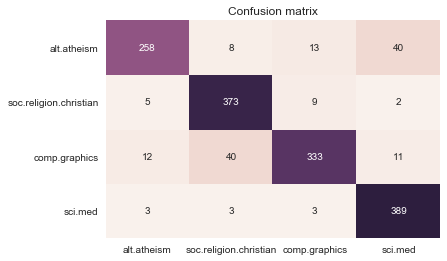

In [15]:

sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

In [16]:
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

God is love => soc.religion.christian
OpenGL on the GPU is fast => comp.graphics


## Метод опорных векторов [Support vector machine, SVM]


<img src="img/svm_1.png" width="200" align='right'>


$a(x) = sign(<w,x>+b)$ – классификатор, задающий разделяющую гиперплоскость

$ \min_{x \in X} |<w,x>+b| = 1$ – нормировка параметров

Требуется построить разделяющую гиперплоскость шириной $ \frac{2}{||w||}$ (т.е. $2 ~ \times $ расстояние от разделяющей гиперплоскости до ближайшего объекта обучающего множества, иначе отступ).


Оптимизационная задача (если выборка линейно разделима):

$ \frac{1}{2} ||w||^2 \rightarrow \min_{w,b} $

$ y_i(<w_i, x_i> + b) \geq 1 $



Kernel trick: $k(x ,x')=\langle  x ,x' \rangle $.



Конспекты Е. Соколова: https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture05-linclass.pdf

Multi-class SVM: https://nlp.stanford.edu/IR-book/html/htmledition/multiclass-svms-1.html

In [17]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

In [18]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8908
micro F1=0.8908, micro P=0.8908, micro R=0.8908
macro F1=0.8880, macro P=0.8868, macro R=0.8936



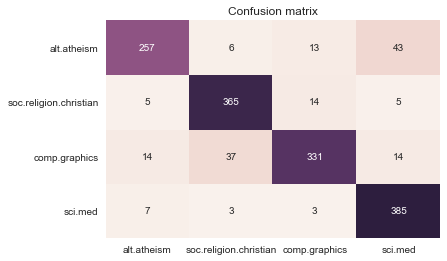

In [19]:
sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

In [20]:
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

God is love => soc.religion.christian
OpenGL on the GPU is fast => comp.graphics


## Деревья решений 



<img src="img/decision-tree.png" width="300" align='center'>

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_counts, twenty_train.target)
predicted = clf.predict(X_test)

In [22]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.7570
micro F1=0.7570, micro P=0.7570, micro R=0.7570
macro F1=0.7537, macro P=0.7544, macro R=0.7582



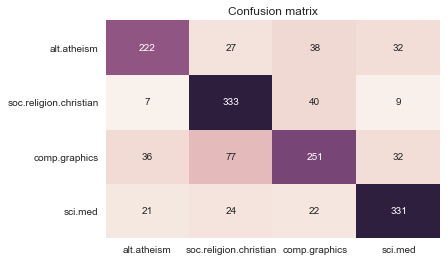

In [23]:
sns.heatmap(data=confusion_matrix(twenty_test.target, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

# Другие методы классификации

**Линейные методы**: 


**Деревья решений**:

* Градиентный бустинг [Xgboost]
* Случайный лес [Random forest]



**Ансамбли классификаторов**




# Другие методы обучения

**Active learning**

**Semi supervised learning**

# Кроссвалидация

![title](img/cv.png)

# Отбор признаков



** Веса **:
* $tf-idf$, $\chi^2$ для взвешивания слов
* меры ассоциации биграм для отбора биграм: $(P)PMI$, $t-score$




** Уменьшение количества признаков **:
* лемматизация
* стемминг
* удаление стоп-слов
* пороги на частоту ($min\_tf$)
* пороги на документную частоту ($max\_df$)




** Признаки **:
* $n$-грамы 
* символьные $n$-грамы  (подслова, subwords)
* именованные сущности 
* термины
* "не\_" + слово 
* сохраним $N$ самых частых слов, остальные представим подсловами и символьные $n$-грамы



** Снижение размерности **:
* скрытые темы в качестве признаков

# Оптимизация гиперпараметров

** Гиперпараметры **:
* $n$ - длина $n$-грамы
* пороги на частоту ($min\_tf$)
* пороги на документную частоту ($max\_df$)
* $\alpha$ в преобразовании Лапласа 
* и др.


![title](img/gs.png)

# Конвеер в sklearn

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (2,3))), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])
text_clf

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 3), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [25]:
text_clf.fit(twenty_train.data, twenty_train.target)  
predicted = text_clf.predict(twenty_test.data)

In [26]:
acc = accuracy_score(predicted, twenty_test.target)
micro_f1 = f1_score(predicted, twenty_test.target, average = 'micro')
micro_p = precision_score(predicted, twenty_test.target, average = 'micro')
micro_r = recall_score(predicted, twenty_test.target, average = 'micro')
macro_f1 = f1_score(predicted, twenty_test.target, average = 'macro')
macro_p = precision_score(predicted, twenty_test.target, average = 'macro')
macro_r = recall_score(predicted, twenty_test.target, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8216
micro F1=0.8216, micro P=0.8216, micro R=0.8216
macro F1=0.8222, macro P=0.8184, macro R=0.8481



In [27]:
predicted = clf.predict(X_new_counts)

for doc, category in zip(docs_new, predicted):
    print('{} => {}'.format(doc, twenty_train.target_names[category]))

God is love => soc.religion.christian
OpenGL on the GPU is fast => comp.graphics


# Лабораторная работа

Классификация новостных статей

# Как на самом деле делается классификация по тональности 

* Классификация на уровне предложений: выражено ли в предложении отношение к чему-то?
* Если да, то к чему – к каким аспектам?
* Построение аггрегированной оценки

![title](img/tonsum.png)

$x_i \in (-inf, +inf)$

$e^{x_i} \in [0, +inf)$

$\frac{e^{x_i}}{\sum_i e^{x_i}} \in [0,1]$